In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

This is nfl data as a csv format from the 2020 season 

In [2]:
df = pd.read_csv('nfl_data.csv')
df

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,qbelo_prob1,qbelo_prob2,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2
0,2020-09-10,2020,0,NaN,KC,HOU,1664.847251,1527.930047,0.761756,0.238244,...,0.751961,0.248039,250.964371,163.113859,240.822204,192.365616,1663.567048,1485.102109,34.0,20.0
1,2020-09-13,2020,0,NaN,CAR,OAK,1417.735566,1437.326108,0.564980,0.435020,...,0.504182,0.495818,221.339338,247.800792,161.791083,188.007296,1400.051159,1477.687771,30.0,34.0
2,2020-09-13,2020,0,NaN,DET,CHI,1404.568948,1524.564659,0.421509,0.578491,...,0.444199,0.555801,188.318387,238.512620,192.712563,150.509484,1423.035870,1541.209626,23.0,27.0
3,2020-09-13,2020,0,NaN,WSH,PHI,1368.490825,1528.560907,0.366499,0.633501,...,0.305872,0.694128,80.105529,-84.549663,87.907130,142.452589,1418.873053,1513.205823,27.0,17.0
4,2020-09-13,2020,0,NaN,MIN,GB,1571.140027,1582.458606,0.576645,0.423355,...,0.531452,0.468548,272.758643,487.232745,169.663822,207.789554,1519.869687,1580.152199,34.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,2021-01-24,2020,0,d,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,2021-01-24,2020,0,d,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,2021-01-31,2020,0,c,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,2021-01-31,2020,0,c,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# get all the different teams in the NFL
unique_teams = df['team1'].unique()
unique_teams = unique_teams[:-1] # last element is nan
unique_teams

array(['KC', 'CAR', 'DET', 'WSH', 'MIN', 'BUF', 'ATL', 'BAL', 'JAX', 'NE',
       'CIN', 'SF', 'NO', 'LAR', 'NYG', 'DEN', 'CLE', 'TB', 'NYJ', 'TEN',
       'IND', 'CHI', 'GB', 'PHI', 'MIA', 'PIT', 'DAL', 'ARI', 'LAC',
       'HOU', 'SEA', 'OAK'], dtype=object)

In [5]:
# get the data for a day vs score graph for the Seahawks (Weeks 1-13)
day = list()
scores = list()
days = 0
for i in range(0, len(df)):
    if df.iloc[i]['team1'] == 'SEA':
        scores.append(df.iloc[i]['score1'])
        days += 1
        day.append(days)
    elif df.iloc[i]['team2'] == 'SEA':
        scores.append(df.iloc[i]['score2'])
        days += 1
        day.append(days)
        
day = day[0:13]
scores = scores[0:13]
print(day)
print(scores)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[38.0, 35.0, 38.0, 31.0, 27.0, 34.0, 37.0, 34.0, 16.0, 28.0, 23.0, 12.0, 40.0]


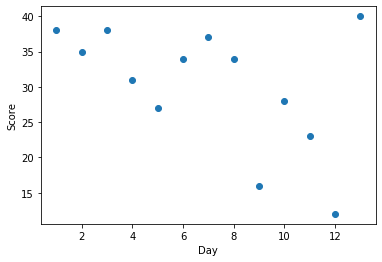

In [6]:
# plot the data from the previous cell

plt.scatter(day, scores)
plt.xlabel('Day')
plt.ylabel('Score')
plt.show()

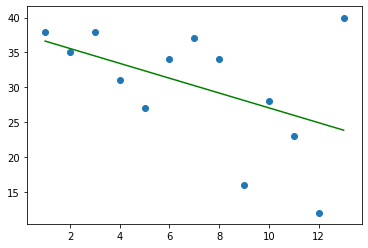

In [7]:
# find the average trend using a line of best fit
x = pd.Series(day).values
y = pd.Series(scores).values
x = x[:, np.newaxis]
linear = linear_model.LinearRegression(fit_intercept=True)
linear.fit(x, y)
y_pred = linear.predict(x)
plt.plot(x, y_pred, color='green')
plt.scatter(x, y)
plt.show()

This is a line of best fit, which was fitted with datapoints for the Seahawks.

In [ ]:
# m is the slope of the line of best fit
m = linear.coef_[0]
if m > 1:
    print("Offense is improving!")
elif m > -1:
    print("Offense is consistent.")
else:
    print("Offense is declining :(")

We can tell from the slope of the line of best fit the trend of the performance of the team.